## VGG16 CNN 모델 적용1
https://brave-greenfrog.tistory.com/47


In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam   # Adam함수 import   #################

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])  # learning late를 변경하는 방법

hist = model.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.2)

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1250/1250 [==============================] - 58s 35ms/step - loss: 1.9001 - accuracy: 0.2254 - val_loss: 1.7226 - val_accuracy: 0.3268
Epoch 2/10
1250/1250 [==============================] - 43s 35ms/step - loss: 1.5200 - accuracy: 0.4100 - val_loss: 1.3930 - val_accuracy: 0.4682
Epoch 3/10
1250/1250 [==============================] - 43s 35ms/step - loss: 1.2328 - accuracy: 0.5409 - val_loss: 1.2060 - val_accuracy: 0.5760
Epoch 4/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0227 - accuracy: 0.6309 - val_loss: 1.0009 - val_accuracy: 0.6414
Epoch 5/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8481 - accuracy: 0.6996 - val_loss: 0.8679 - val_accuracy: 0.6990
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7149 - accuracy: 0.7513 - val_loss: 0.8464 - val_accuracy: 0.7177
Epoch 7/10
1250/1250 [==============================] - 4

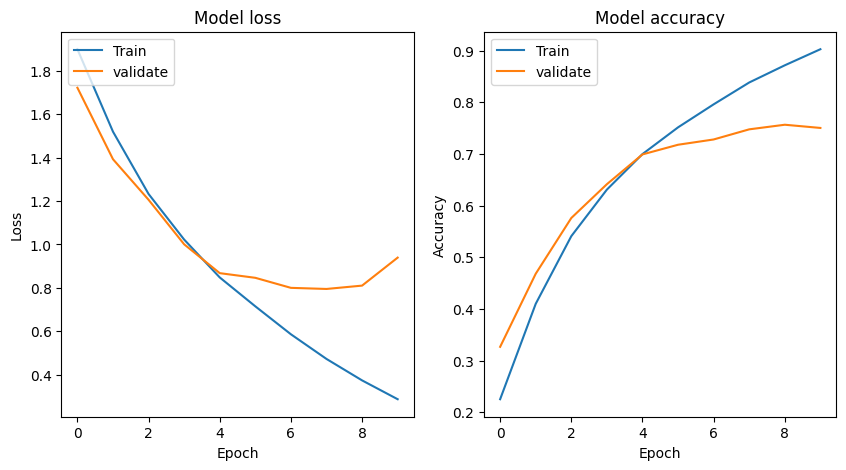

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

## 이미 잘 훈련된 (똑똑한)모델 다운받아 사용해 보기
https://keras.io/api/applications/

대규모 이미지 분류 경진대회인 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)
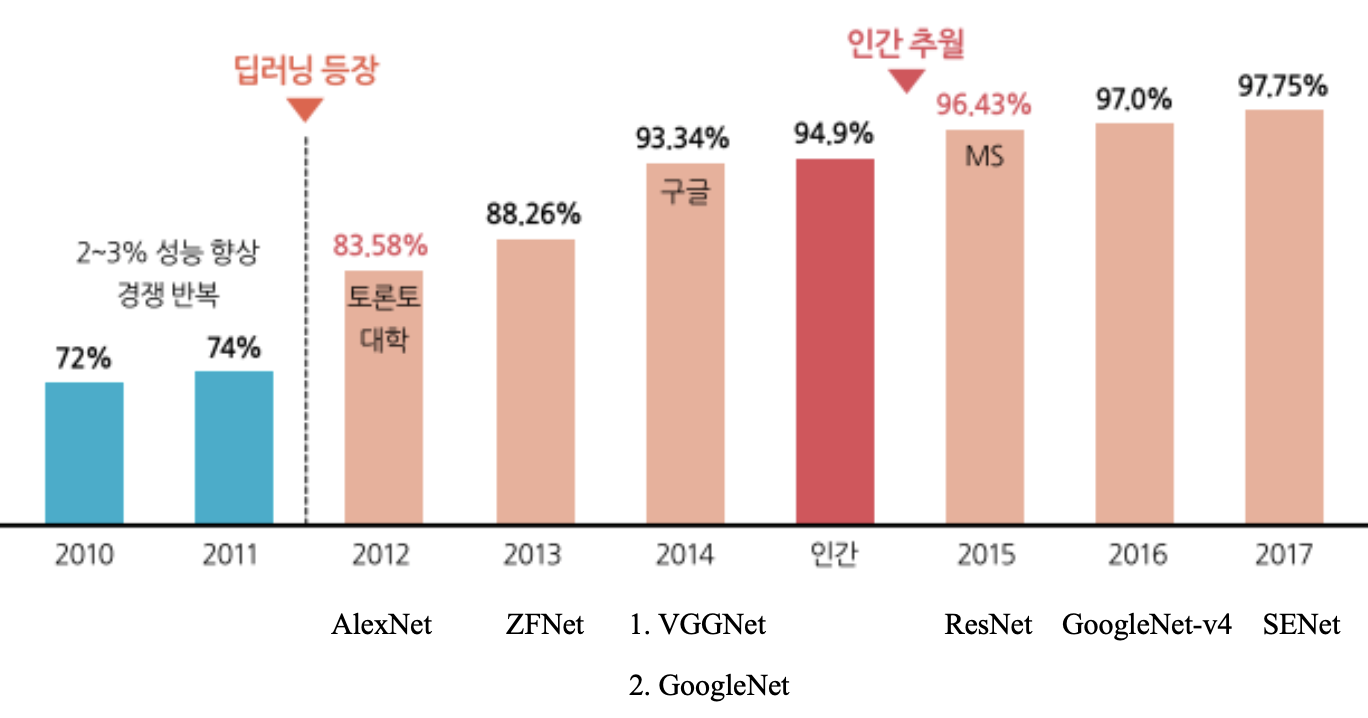

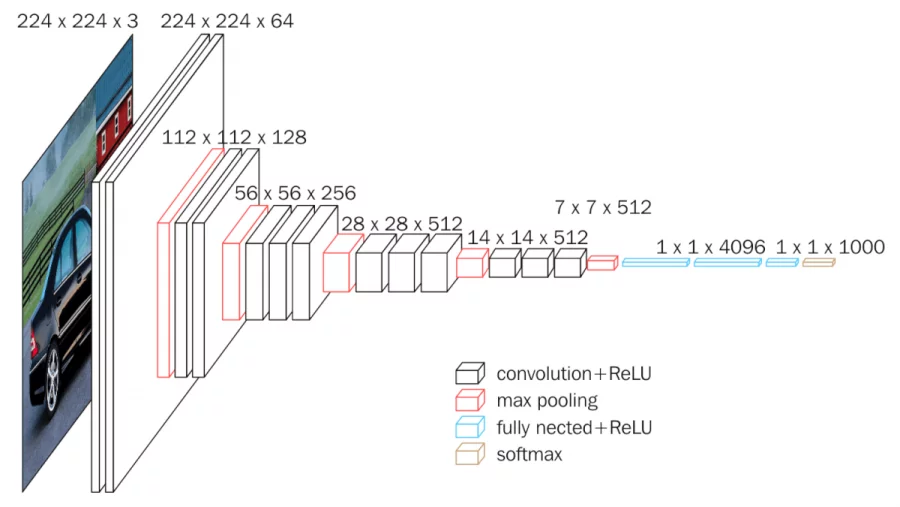

클래스 보기
https://github.com/raghakot/keras-vis/blob/master/resources/imagenet_class_index.json

In [ ]:
# 전체코드
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

model = VGG16()
image = load_img('파일?????', target_size=(224, 224))                 # 이미지를 불러와서 224, 224 크기로 변경
image = img_to_array(image)                                           # 이미지를 배열로 변환 (224, 224, 3)
image = image.reshape(1, 224, 224, 3)                                 #
image = preprocess_input(image)                                       # VGG16 학습당시 사용한 이미지 환경대로 이미지 값 변경

pred = model.predict(image)
label = decode_predictions(pred)

label = label[0][0]
print(f'{label[1]} {label[2]*100}')

1/1 [==============================] - 0s 139ms/step
great_white_shark 77.4774432182312


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

model = VGG16()
image = load_img('/content/tench.jpg', target_size=(224, 224))    # 이미지를 불러와서 224, 224 크기로 변경
image = img_to_array(image)                                       # 이미지를 배열로 변환 (224, 224, 3)
image = image.reshape(1, 224, 224, 3)                             #
image = preprocess_input(image)                                   # VGG16 학습당시 사용한 이미지 환경대로 이미지 값 변경

In [ ]:
pred = model.predict(image)

In [ ]:
label = decode_predictions(pred)
label

In [ ]:
label = label[0][0]

print(f'{label[1]} {label[2]*100}')

## VGG16을 커스터마이징하기
imagenet 데이터셋 --> cifar-10 데이터셋

### Keras에서 VGG16 모델 가져오기
```
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16		# VGG16 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam   # Adam함수 import

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

CNN_VGG = VGG16(weights='imagenet',
                include_top=True,
                input_tensor=Input(shape=(32, 32, 3)))
    # weights : 가중치 모델 지정 ( None : 초기화된 가중치, 'imagenet' : 사전 학습된 가중치 )
    # include_top : 신경망 FC 층 존재 유무 ( False : 제거 / True : 유지 )
    # input_tensor : 입력 텐서 크기 ( Input(shape = (w, h, ch))

model = Sequential()
model.add(CNN_VGG)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

hist = model.fit(train_x, train_y, batch_size=64, epochs=10, validation_split=0.2)